In [1]:
import pandas as pd
import re
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)


In [24]:
population = pd.read_csv("data/population.csv", skiprows =[0])
coffe_shop_df = pd.read_excel("data/coffee_shop_data.xlsx")


In [25]:
population.head(10)

,Geography,Label for GEO_ID,Race/Ethnic Group,Population Groups,Total,Errata of Total,Total!!1-person household,Total!!2-person household,Total!!3-person household,Total!!4-person household,Total!!5-person household,Total!!6-person household,Total!!7-or-more-person household
0,8600000US89010,ZCTA5 89010,1,Total population,172,NaN,51,69,19,12,12,4,5
1,8600000US89019,ZCTA5 89019,1,Total population,1164,NaN,412,421,134,83,57,32,25
2,8600000US89060,ZCTA5 89060,1,Total population,4144,NaN,1106,1714,550,361,222,95,96
3,8600000US89061,ZCTA5 89061,1,Total population,2109,NaN,469,936,283,206,112,62,41
4,8600000US89439,ZCTA5 89439,1,Total population,671,NaN,193,314,88,55,17,2,2
5,8600000US90001,ZCTA5 90001,1,Total population,12971,NaN,1244,1786,1934,2387,2077,1453,2090
6,8600000US90002,ZCTA5 90002,1,Total population,11731,NaN,1548,1712,1692,1829,1690,1196,2064
7,8600000US90003,ZCTA5 90003,1,Total population,15642,NaN,2059,2308,2341,2642,2270,1551,2471
8,8600000US90004,ZCTA5 90004,1,Total population,22547,NaN,6252,6074,3754,3318,1705,773,671
9,8600000US90005,ZCTA5 90005,1,Total population,15044,NaN,5005,4054,2377,1982,938,379,309


In [26]:
coffe_shop_df.head(10)

,ID no.,Business Name,Street address,City,State,Zip Code,Phone,Rating,Gender majority,Median Salary,Latte Price
0,1,Brew Haven,8 Old Shore Place,Oakland,California,94616,415-810-4769,4.5,Male,72463,3.31000
1,2,Bean Bliss,6650 Clarendon Crossing,Stockton,California,95210,209-701-1665,5.0,Female,87117,5.35000
2,3,Caffeine Cove,7281 Buell Road,Fresno,California,93773,559-137-3554,4.7,Male,86394,4.15000
3,4,Mug Magic,670 Jackson Avenue,Torrance,California,90510,818-789-5573,4.3,Male,88343,5.34000
4,5,Daily Grind,37 Ludington Terrace,San Diego,California,92196,619-354-2389,1.6,Male,77795,4.51175
5,6,Espresso Elegance,8427 Atwood Road,Visalia,California,93291,559-929-4731,1.2,Female,78753,5.31765
6,7,Java Jolt,58 Welch Terrace,Sacramento,California,94273,916-163-2426,4.9,Female,73380,4.79900
7,8,Cuppa Comfort,3582 Russell Drive,South Lake Tahoe,California,96154,530-505-6560,4.1,Male,88458,5.37290
8,9,Roast & Relax,5016 Anniversary Point,South Lake Tahoe,California,96154,530-400-9041,3.3,Male,88458,5.69490
9,10,Perk Palace,7 David Junction,Fresno,California,93726,559-323-2365,4.2,Female,80973,5.30665


In [27]:
# Chekc for data info - including data types and missing values
coffe_shop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID no.           1000 non-null   int64  
 1   Business Name    1000 non-null   object 
 2   Street address   1000 non-null   object 
 3   City             1000 non-null   object 
 4   State            1000 non-null   object 
 5   Zip Code         1000 non-null   int64  
 6   Phone            1000 non-null   object 
 7   Rating           1000 non-null   float64
 8   Gender majority  1000 non-null   object 
 9   Median Salary    1000 non-null   int64  
 10  Latte Price      1000 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 86.1+ KB


In [28]:
# Check the number of rows/records and features/columns
coffe_shop_df.shape

(1000, 11)

In [29]:
population.shape

(1705, 13)

In [30]:
# Check the basic statistics of the data - average latte price and salary
coffe_shop_df.describe()

,ID no.,Zip Code,Rating,Median Salary,Latte Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,92976.163000,3.784600,81182.842000,5.061491
std,288.819436,1706.943177,1.150717,5142.670356,0.352002
min,1.000000,90005.000000,1.000000,72001.000000,3.090000
25%,250.750000,91751.750000,3.200000,76776.000000,4.830175
50%,500.500000,92883.000000,4.240000,81113.000000,5.062450
75%,750.250000,94257.000000,4.580000,85684.000000,5.310025
max,1000.000000,96154.000000,5.000000,89978.000000,6.480000


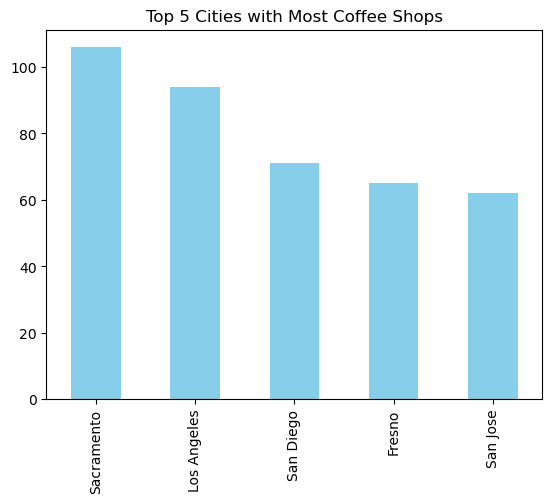

In [31]:
ax = coffe_shop_df["City"].value_counts().head(5).plot(kind="bar", color="skyblue")
ax.set_title("Top 5 Cities with Most Coffee Shops")
plt.show()

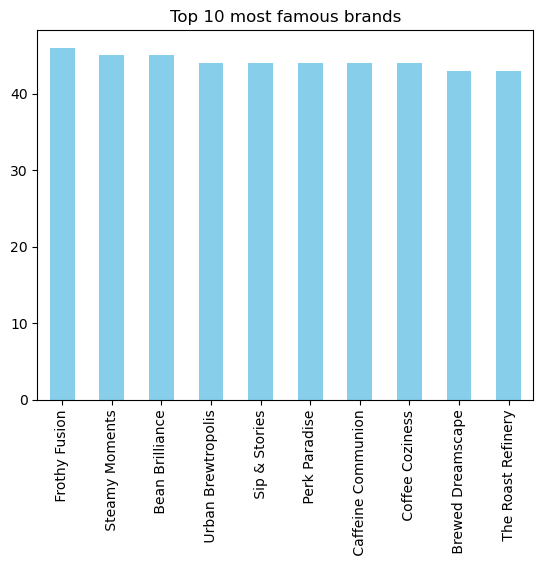

In [32]:
ax = coffe_shop_df["Business Name"].value_counts().head(10).plot(kind="bar", color="skyblue")
ax.set_title("Top 10 most famous brands")
plt.show()

### Data preprocessing

In [33]:
# Check for null values.
coffe_shop_df.isna().sum()

ID no.             0
Business Name      0
Street address     0
City               0
State              0
Zip Code           0
Phone              0
Rating             0
Gender majority    0
Median Salary      0
Latte Price        0
dtype: int64

In [34]:
# Convert the "Zip Code" column to string data type
coffe_shop_df["Zip Code"] = coffe_shop_df["Zip Code"].astype(str)

In [35]:
# Extract zip code from the population data
# Find all the zip codes that havew 5 digit patterns. (Get the lat 5 digits)
# Create a new column "Zip Code" in the population data

def find_zip_code(geocode):
    pattern = r"\d{5}$"
    match = re.search(pattern, geocode)
    if match:
        zip_code = match.group(0)
    return zip_code

In [37]:
# Apply the function to the "Geocode" column
population["Zip Code"] = population["Geography"].apply(find_zip_code)

In [38]:
population.head()

,Geography,Label for GEO_ID,Race/Ethnic Group,Population Groups,Total,Errata of Total,Total!!1-person household,Total!!2-person household,Total!!3-person household,Total!!4-person household,Total!!5-person household,Total!!6-person household,Total!!7-or-more-person household,Zip Code
0,8600000US89010,ZCTA5 89010,1,Total population,172,NaN,51,69,19,12,12,4,5,89010
1,8600000US89019,ZCTA5 89019,1,Total population,1164,NaN,412,421,134,83,57,32,25,89019
2,8600000US89060,ZCTA5 89060,1,Total population,4144,NaN,1106,1714,550,361,222,95,96,89060
3,8600000US89061,ZCTA5 89061,1,Total population,2109,NaN,469,936,283,206,112,62,41,89061
4,8600000US89439,ZCTA5 89439,1,Total population,671,NaN,193,314,88,55,17,2,2,89439


In [39]:
# Merge the two dataframes on the "Zip Code" column
coffe_shop_data = coffe_shop_df.copy() # make a copy of the coffee shop data
combined_coffee_shop_data_with_popn = pd.merge(coffe_shop_data, population, on="Zip Code")


In [40]:
combined_coffee_shop_data_with_popn.head()

,ID no.,Business Name,Street address,City,State,Zip Code,Phone,Rating,Gender majority,Median Salary,...,Population Groups,Total,Errata of Total,Total!!1-person household,Total!!2-person household,Total!!3-person household,Total!!4-person household,Total!!5-person household,Total!!6-person household,Total!!7-or-more-person household
0,2,Bean Bliss,6650 Clarendon Crossing,Stockton,California,95210,209-701-1665,5.00,Female,87117,...,Total population,11180,NaN,1995,2469,1841,1873,1339,786,877
1,316,Caffeine Castle,72 Oak Crossing,Stockton,California,95210,209-149-9942,4.75,Male,87117,...,Total population,11180,NaN,1995,2469,1841,1873,1339,786,877
2,725,Frothy Fusion,9266 Susan Point,Stockton,California,95210,209-877-9648,4.19,Female,87117,...,Total population,11180,NaN,1995,2469,1841,1873,1339,786,877
3,908,Urban Brewtropolis,92 Hoepker Parkway,Stockton,California,95210,209-651-1370,4.50,Male,87117,...,Total population,11180,NaN,1995,2469,1841,1873,1339,786,877
4,6,Espresso Elegance,8427 Atwood Road,Visalia,California,93291,559-929-4731,1.20,Female,78753,...,Total population,15310,NaN,2520,3892,2500,2694,1793,996,915


In [42]:
# Remove all other columns from the population data set except the
# Total population
columns = coffe_shop_data.columns.values.tolist()+["Total"]
columns

['ID no.',
 'Business Name',
 'Street address',
 'City',
 'State',
 'Zip Code',
 'Phone',
 'Rating',
 'Gender majority',
 'Median Salary',
 'Latte Price',
 'Total']

In [43]:
combined_coffee_shop_data_with_popn = combined_coffee_shop_data_with_popn[columns]

In [44]:
combined_coffee_shop_data_with_popn

,ID no.,Business Name,Street address,City,State,Zip Code,Phone,Rating,Gender majority,Median Salary,Latte Price,Total
0,2,Bean Bliss,6650 Clarendon Crossing,Stockton,California,95210,209-701-1665,5.00,Female,87117,5.35000,11180
1,316,Caffeine Castle,72 Oak Crossing,Stockton,California,95210,209-149-9942,4.75,Male,87117,5.44385,11180
2,725,Frothy Fusion,9266 Susan Point,Stockton,California,95210,209-877-9648,4.19,Female,87117,5.09785,11180
3,908,Urban Brewtropolis,92 Hoepker Parkway,Stockton,California,95210,209-651-1370,4.50,Male,87117,5.53185,11180
4,6,Espresso Elegance,8427 Atwood Road,Visalia,California,93291,559-929-4731,1.20,Female,78753,5.31765,15310
...,...,...,...,...,...,...,...,...,...,...,...,...
407,659,The Roast Refinery,26967 Stone Corner Place,San Francisco,California,94121,858-344-2510,5.00,Female,80124,4.72020,17295
408,764,The Roast Refinery,684 Rockefeller Pass,San Francisco,California,94121,415-398-5800,4.15,Male,80124,4.71220,17295
409,664,Java Joyhouse,9681 Butterfield Alley,Inglewood,California,90305,310-377-5635,4.69,Male,76776,5.01280,5933
410,804,Steamy Moments,9602 Mallory Street,Inglewood,California,90305,310-846-1674,4.50,Female,76776,4.78480,5933


In [47]:
# Rename total to population
combined_coffee_shop_data_with_popn.rename(columns={"Total":"Population"}, inplace=True)


In [48]:
# Keep only the relevant features
combined_coffee_shop_data_with_popn = combined_coffee_shop_data_with_popn[["Zip Code", "Rating", "Median Salary", "Latte Price", "Population"]]

In [49]:
combined_coffee_shop_data_with_popn.head()

,Zip Code,Rating,Median Salary,Latte Price,Population
0,95210,5.00,87117,5.35000,11180
1,95210,4.75,87117,5.44385,11180
2,95210,4.19,87117,5.09785,11180
3,95210,4.50,87117,5.53185,11180
4,93291,1.20,78753,5.31765,15310


In [50]:
combined_coffee_shop_data_with_popn.columns

Index(['Zip Code', 'Rating', 'Median Salary', 'Latte Price', 'Population'], dtype='object')

In [51]:
# Calculate the total number of coffee shops in each zip code
coffee_shop_count = combined_coffee_shop_data_with_popn["Zip Code"].value_counts().reset_index()

In [52]:
coffee_shop_count.columns = ["Zip Code", "Coffee Shop Count"]

In [54]:
coffee_shop_count

,Zip Code,Coffee Shop Count
0,90040,11
1,93111,10
2,90505,10
3,92410,10
4,92867,9
...,...,...
74,90305,2
75,91103,2
76,94611,1
77,95118,1


In [55]:
# Change the dataype of the "Zip Code" column to string
combined_coffee_shop_data_with_popn["Zip Code"] = combined_coffee_shop_data_with_popn["Zip Code"].astype(str)
coffee_shop_count["Zip Code"] = coffee_shop_count["Zip Code"].astype(str)

/var/folders/0d/975d1jtj1v5692v1l52lsc5w0000gn/T/ipykernel_68829/3757826757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_coffee_shop_data_with_popn["Zip Code"] = combined_coffee_shop_data_with_popn["Zip Code"].astype(str)


In [56]:
# Merge the counts back into the original dataframe
combined_coffee_shop_data_with_popn = combined_coffee_shop_data_with_popn.merge(coffee_shop_count, on="Zip Code", how="left")

In [57]:
combined_coffee_shop_data_with_popn.head()

,Zip Code,Rating,Median Salary,Latte Price,Population,Coffee Shop Count
0,95210,5.00,87117,5.35000,11180,4
1,95210,4.75,87117,5.44385,11180,4
2,95210,4.19,87117,5.09785,11180,4
3,95210,4.50,87117,5.53185,11180,4
4,93291,1.20,78753,5.31765,15310,7


In [58]:
# Sort based on the below criteria:
# a. High population
# b. Low total number of coffee shops
# c. Low ratings
# d. High median salary

sorted_coffee_shop_df = combined_coffee_shop_data_with_popn.sort_values(
    by=["Population", "Coffee Shop Count", "Rating", "Median Salary"],
    ascending=[False, True, True, False]
).reset_index(drop=True)

In [59]:
sorted_coffee_shop_df.head()

,Zip Code,Rating,Median Salary,Latte Price,Population,Coffee Shop Count
0,94110,2.22,74020,5.045,27128,5
1,94110,3.50,74020,5.047,27128,5
2,94110,4.40,74020,5.059,27128,5
3,94110,4.50,74020,4.779,27128,5
4,94110,4.70,74020,4.581,27128,5


In [61]:
# Created a list - if length of list 5, if the zip code is already present, it will not add that into the list. 
# Deduping zip code column and displaying all of the records for the top 5.

lst = []

for i in range(len(sorted_coffee_shop_df)):
    if len(lst) !=5:
        if sorted_coffee_shop_df["Zip Code"][i] not in lst:
            lst.append(sorted_coffee_shop_df["Zip Code"][i])

In [62]:
# Filter "sorted_coffee_shop_df" to only include rows where  zip code is in the lst

top_5_zip_codes_df = sorted_coffee_shop_df[sorted_coffee_shop_df["Zip Code"].isin(lst)]

In [63]:
top_5_zip_codes_df

,Zip Code,Rating,Median Salary,Latte Price,Population,Coffee Shop Count
0,94110,2.22,74020,5.04500,27128,5
1,94110,3.50,74020,5.04700,27128,5
2,94110,4.40,74020,5.05900,27128,5
3,94110,4.50,74020,4.77900,27128,5
4,94110,4.70,74020,4.58100,27128,5
5,90805,3.00,88140,5.47900,26056,4
6,90805,3.89,88140,5.31900,26056,4
7,90805,4.31,88140,5.02100,26056,4
8,90805,4.37,88140,5.20700,26056,4
9,95823,4.30,73165,4.96825,22470,3


In [64]:
X = combined_coffee_shop_data_with_popn.drop(["Zip Code", "Latte Price"], axis=1) # Include features - Rating, Median Salary, Population excluding the target variable (Latte Price, Zip Code) 

In [65]:
y = combined_coffee_shop_data_with_popn["Latte Price"] # Target variable

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Scale the features
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
# Model selection
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR()
}

In [70]:
# Hyperparamter tunning
param_grid = {
    "Ridge": {"alpha": [0.1, 1, 10]},
    "Lasso": {"alpha": [0.1, 1, 10]},
    "Random Forest": {"n_estimators": [50, 100, 200, 300], "max_depth": [None, 5, 10, 15, 20]},
    "Gradient Boosting": {"n_estimators": [50, 100, 200, 300], "max_depth": [5, 10, 15, 10]},
    "Support Vector Machine": {"C": [0.1, 1, 10], "epsilon": [0.1, 1, 10]}
}

In [71]:
# Hyperparameter tuning using GridSearchCV
for model_name, model in models.items():
    if model_name in param_grid:
        # Hyperparameter tuning using GridSearchCV
        grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring="neg_mean_squared_error")
        grid_search.fit(X, y)

        # Set the best hyperparameters to the model
        models[model_name] = grid_search.best_estimator_

In [72]:
# Model Training
for model_name, model in models.items():
    # Train the model with best hyperparameters on the training set
    model.fit(X_train, y_train)

In [73]:
# Model Evaluation
for model_name, model in models.items():
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the evaluation metrics
    mse_score = mse(y_test, y_pred)
    mae_score = mae(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model_name} Metrics:")
    print(f"Mean Squared Error: {mse_score:.2f}")
    print(f"Mean Absolute Error: {mae_score:.2f}")
    print(f"R2 Score: {r2:.2f}")
    print("\n")

Model: Linear Regression Metrics:
Mean Squared Error: 0.07
Mean Absolute Error: 0.22
R2 Score: 0.50


Model: Ridge Metrics:
Mean Squared Error: 0.07
Mean Absolute Error: 0.22
R2 Score: 0.49


Model: Lasso Metrics:
Mean Squared Error: 0.13
Mean Absolute Error: 0.30
R2 Score: -0.00


Model: Random Forest Metrics:
Mean Squared Error: 0.08
Mean Absolute Error: 0.23
R2 Score: 0.43


Model: Gradient Boosting Metrics:
Mean Squared Error: 0.09
Mean Absolute Error: 0.24
R2 Score: 0.34


Model: Support Vector Machine Metrics:
Mean Squared Error: 0.10
Mean Absolute Error: 0.25
R2 Score: 0.26




In [75]:
# Transform (Scale the dataframe) the dataframe to be the same as the training data so that the model can accurately predict the latte price.
zip_codes_df = top_5_zip_codes_df.drop(["Latte Price", "Zip Code"], axis=1)
zip_codes_df = scaler.transform(zip_codes_df)

In [76]:
# Predict the latte price for the top 5 zip codes
for model_name, model in models.items():
    # Predict the latte price for the top 5 zip codes
    latte_price = model.predict(zip_codes_df)
    top_5_zip_codes_df[model_name] = latte_price

    print(f"Model: {model_name} Predicted Prices for the Top 5 Zip Codes:")
    print(latte_price)
    print("\n")

Model: Linear Regression Predicted Prices for the Top 5 Zip Codes:
[4.77434362 4.77785713 4.78032758 4.78060207 4.78115106 5.35936497
 5.36180796 5.36296083 5.36312553 4.73964666 4.74107402 4.74140342
 4.70104617 4.70143046 4.70156771 4.70175986 4.70175986 4.70346172
 5.22612359]


Model: Ridge Predicted Prices for the Top 5 Zip Codes:
[4.78037409 4.78423779 4.78695446 4.78725631 4.78786001 5.34818232
 5.3508688  5.35213658 5.35231769 4.74919353 4.75076315 4.75112538
 4.71044603 4.71086863 4.71101955 4.71123085 4.71123085 4.71310233
 5.22177542]


Model: Lasso Predicted Prices for the Top 5 Zip Codes:
[5.05681079 5.05681079 5.05681079 5.05681079 5.05681079 5.05681079
 5.05681079 5.05681079 5.05681079 5.05681079 5.05681079 5.05681079
 5.05681079 5.05681079 5.05681079 5.05681079 5.05681079 5.05681079
 5.05681079]


Model: Random Forest Predicted Prices for the Top 5 Zip Codes:
[4.91340902 4.93122744 4.92859973 4.90408397 4.90883826 5.25416775
 5.27021428 5.21828972 5.24082599 4.86713645 

/var/folders/0d/975d1jtj1v5692v1l52lsc5w0000gn/T/ipykernel_68829/3397837334.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_zip_codes_df[model_name] = latte_price
/var/folders/0d/975d1jtj1v5692v1l52lsc5w0000gn/T/ipykernel_68829/3397837334.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_zip_codes_df[model_name] = latte_price
/var/folders/0d/975d1jtj1v5692v1l52lsc5w0000gn/T/ipykernel_68829/3397837334.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [77]:
top_5_zip_codes_df

,Zip Code,Rating,Median Salary,Latte Price,Population,Coffee Shop Count,Linear Regression,Ridge,Lasso,Random Forest,Gradient Boosting,Support Vector Machine
0,94110,2.22,74020,5.04500,27128,5,4.774344,4.780374,5.056811,4.913409,5.029759,5.102928
1,94110,3.50,74020,5.04700,27128,5,4.777857,4.784238,5.056811,4.931227,5.015413,5.147044
2,94110,4.40,74020,5.05900,27128,5,4.780328,4.786954,5.056811,4.928600,4.982724,4.948769
3,94110,4.50,74020,4.77900,27128,5,4.780602,4.787256,5.056811,4.904084,4.833299,4.905308
4,94110,4.70,74020,4.58100,27128,5,4.781151,4.787860,5.056811,4.908838,4.860839,4.809428
5,90805,3.00,88140,5.47900,26056,4,5.359365,5.348182,5.056811,5.254168,5.390922,5.378843
6,90805,3.89,88140,5.31900,26056,4,5.361808,5.350869,5.056811,5.270214,5.306940,5.220682
7,90805,4.31,88140,5.02100,26056,4,5.362961,5.352137,5.056811,5.218290,5.153844,5.121869
8,90805,4.37,88140,5.20700,26056,4,5.363126,5.352318,5.056811,5.240826,5.218160,5.106955
9,95823,4.30,73165,4.96825,22470,3,4.739647,4.749194,5.056811,4.867136,4.921251,4.880249


In [78]:
predictions = {}

for model_name, model in models.items():
    # Predict the latte price for the top 5 zip codes
    predictions[model_name] = model.predict(zip_codes_df)

# Convert the predictions dictionary to a dataframe
predictions_df = pd.DataFrame(predictions)
# Add the "Zip Code" column to the dataframe
predictions_df["Zip Code"] = top_5_zip_codes_df["Zip Code"].values

# Rearragne the columsn to have "Zip Code" as the first column
cols = ["Zip Code"] + [col for col in predictions_df.columns if col != "Zip Code"]
predictions_df = predictions_df[cols]

predictions_df


,Zip Code,Linear Regression,Ridge,Lasso,Random Forest,Gradient Boosting,Support Vector Machine
0,94110,4.774344,4.780374,5.056811,4.913409,5.029759,5.102928
1,94110,4.777857,4.784238,5.056811,4.931227,5.015413,5.147044
2,94110,4.780328,4.786954,5.056811,4.928600,4.982724,4.948769
3,94110,4.780602,4.787256,5.056811,4.904084,4.833299,4.905308
4,94110,4.781151,4.787860,5.056811,4.908838,4.860839,4.809428
5,90805,5.359365,5.348182,5.056811,5.254168,5.390922,5.378843
6,90805,5.361808,5.350869,5.056811,5.270214,5.306940,5.220682
7,90805,5.362961,5.352137,5.056811,5.218290,5.153844,5.121869
8,90805,5.363126,5.352318,5.056811,5.240826,5.218160,5.106955
9,95823,4.739647,4.749194,5.056811,4.867136,4.921251,4.880249


In [88]:
agg_df = predictions_df.groupby("Zip Code")["Gradient Boosting"].agg([("Highest", "max"), ("Lowest", "min"), ("Average", "mean")]).reset_index()

In [89]:
agg_df.columns = ["Zip Code", "Highest", "Lowest", "Average"]

Text(0.5, 1.0, 'Lowest, Average and Highest Latte Prices for the Top 5 Zip Codes – Gradient Boosting')

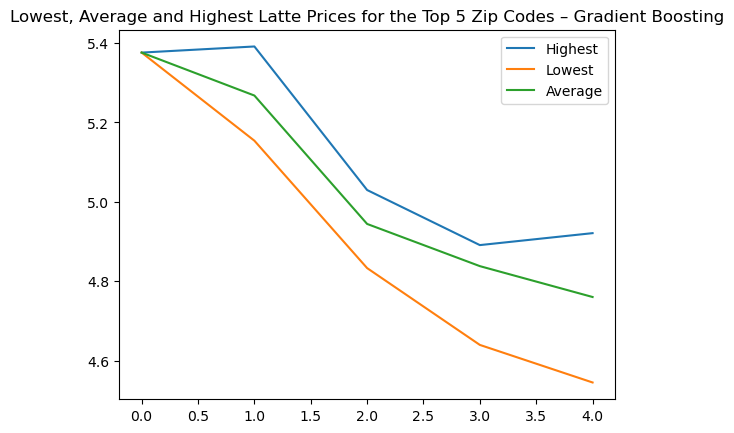

In [93]:
ax = agg_df.plot()
ax.set_title("Lowest, Average and Highest Latte Prices for the Top 5 Zip Codes – Gradient Boosting")
